## Stranding of sea otters

![Sea Otter](https://cosmosmagazine.com/wp-content/uploads/2020/02/190624_sea_otters_full-1440x863.jpg)

**Background info:**

Sea Otters can live to be up to 20, years old. The majority of sea otter pups are born in early spring.
By one estimate, only 25% of pups survive their first year.
Births occur year-round, with peaks between May and June in northern populations and between January and March in southern populations.In California, sea otters usually breed every year, about twice as often as those in Alaska.

A sea otter is considered an adult at three years and older. Sub-adults are one–three years,
juveniles are six months–one year, and pups are younger than six months. 

In [1]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()  #handle large datasets
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

import pickle

import geopandas as gpd
from shapely.geometry import Point
import folium

In [2]:
FOLDERPATH = '../data/'     # set path to data folder

### Census data, 1985-2014

In [3]:
census = pd.read_csv(FOLDERPATH+'annual_census_1985-2014.csv')

**Census data description**

1. 53780 samples, 17 attributes
2. There aren't any null attributes.
3. *HAB_ID* is same as *POLY_ID*
4. *POLY_ID*, *ZONE_CODE*, *HAB_ID* and *DEPTH* are object type. (Strings)
5. *ATOS_ID* + *ZONE_CODE* = *HAB_ID*   (for 53776/53780 samples)
6. *FID* is unique ID.
7. *ZONE* is a numeric identifier for *ZONE_CODE*
8. There are about 2286/2285 habitat zones, but each year covers different habitats.

In [4]:
census.head()

,FID,PERIMETER,AREA,DEPTH,ATOS_ID,HAB_ID,ACRES,HECTARES,ZONE_CODE,ZONE,Year,POLY_ID,dens_sm,pupratio,lin_dens,trend5yr,Sect_ID
0,0,7.674904,1.502586,0 to -30m,960,960n,371.297008,150.258568,n,2,1985.0,960n,0.074644,0.0,0.133333,0.0,12.0
1,1,8.150749,1.932601,0 to -30m,958,958n,477.556112,193.260102,n,2,1985.0,958n,0.071625,0.0,0.133333,0.0,12.0
2,2,11.311080,2.835678,-30 to -60m,956,956o,700.711413,283.567848,o,3,1985.0,956o,0.000000,0.0,0.133333,0.0,12.0
3,3,7.708984,1.791305,0 to -30m,961,961n,442.641052,179.130478,n,2,1985.0,961n,0.063913,0.0,0.117460,0.0,12.0
4,4,7.862669,1.523677,0 to -30m,959,959n,376.508706,152.367667,n,2,1985.0,959n,0.074456,0.0,0.133333,0.0,12.0


In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53780 entries, 0 to 53779
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FID        53780 non-null  int64  
 1   PERIMETER  53780 non-null  float64
 2   AREA       53780 non-null  float64
 3   DEPTH      53780 non-null  object 
 4   ATOS_ID    53780 non-null  int64  
 5   HAB_ID     53780 non-null  object 
 6   ACRES      53780 non-null  float64
 7   HECTARES   53780 non-null  float64
 8   ZONE_CODE  53780 non-null  object 
 9   ZONE       53780 non-null  int64  
 10  Year       53780 non-null  float64
 11  POLY_ID    53780 non-null  object 
 12  dens_sm    53780 non-null  float64
 13  pupratio   53780 non-null  float64
 14  lin_dens   53780 non-null  float64
 15  trend5yr   53780 non-null  float64
 16  Sect_ID    53780 non-null  float64
dtypes: float64(10), int64(3), object(4)
memory usage: 7.0+ MB


In [6]:
census.nunique()

FID          53780
PERIMETER     2286
AREA          2286
DEPTH            4
ATOS_ID       1142
HAB_ID        2285
ACRES         2286
HECTARES      2286
ZONE_CODE        4
ZONE             4
Year            29
POLY_ID       2285
dens_sm      28134
pupratio     10263
lin_dens      3663
trend5yr     22711
Sect_ID         14
dtype: int64

In [7]:
'''
NUMBER OF HAB_ID==POLY_ID is same as the number of samples in the data.
'''
(census.HAB_ID == census.POLY_ID).sum()

53780

In [8]:
census['ATOS_ZONE'] = census.ATOS_ID.astype(str)+census.ZONE_CODE

In [9]:
mask = (census.HAB_ID == census.ATOS_ZONE)
mask.sum()

53776

In [10]:
census[~mask]

,FID,PERIMETER,AREA,DEPTH,ATOS_ID,HAB_ID,ACRES,HECTARES,ZONE_CODE,ZONE,Year,POLY_ID,dens_sm,pupratio,lin_dens,trend5yr,Sect_ID,ATOS_ZONE
24797,24797,5.728268,1.244847,0 to -30m,1286,126n,307.608454,124.484725,n,2,1999.0,126n,0.086904,0.0,0.206341,0.282823,1.0,1286n
26899,26899,5.728268,1.244847,0 to -30m,1286,126n,307.608454,124.484725,n,2,2000.0,126n,0.108781,0.0,0.253959,0.439971,1.0,1286n
29005,29005,5.728268,1.244847,0 to -30m,1286,126n,307.608454,124.484725,n,2,2001.0,126n,0.093174,0.0,0.206337,0.437835,1.0,1286n
45294,45294,5.728268,1.244847,0 to -30m,1286,126n,307.608454,124.484725,n,2,2009.0,126n,0.203636,0.0,0.475415,0.500388,1.0,1286n


In [11]:
census.ZONE.unique(),census.ZONE_CODE.unique()

(array([2, 3, 1, 4]), array(['n', 'o', 'b', 'w'], dtype=object))

#### Important attributes to consider
AREA, DEPTH, HAB_ID, ZONE_CODE, Year, dens_sm, pupratio, lin_dens, trend5yr

In [12]:
attributes = ['AREA','DEPTH','HAB_ID','ZONE_CODE','Year','dens_sm','pupratio','lin_dens','trend5yr']
org_data = census.copy()
census = org_data[attributes]
census.head()

,AREA,DEPTH,HAB_ID,ZONE_CODE,Year,dens_sm,pupratio,lin_dens,trend5yr
0,1.502586,0 to -30m,960n,n,1985.0,0.074644,0.0,0.133333,0.0
1,1.932601,0 to -30m,958n,n,1985.0,0.071625,0.0,0.133333,0.0
2,2.835678,-30 to -60m,956o,o,1985.0,0.000000,0.0,0.133333,0.0
3,1.791305,0 to -30m,961n,n,1985.0,0.063913,0.0,0.117460,0.0
4,1.523677,0 to -30m,959n,n,1985.0,0.074456,0.0,0.133333,0.0


#### Get otter counts
We have density of otter in sq km of a habitat and area of habitat. Using that we can find the total independent otter count. And using pup to independent ratio, we can find pup otter count. More details [here](https://www.sciencebase.gov/catalog/item/5a32d390e4b08e6a89d88583).

In [13]:
census['independent_otters'] = census.dens_sm * census.AREA
census['independent_otters'] = census.independent_otters.apply(math.floor)  #should be round up or down??

census['pup_otters'] = census.independent_otters * census.pupratio
census['pup_otters'] = census.pup_otters.apply(math.floor)  #should be round up or down??

census['total_otters'] = census.independent_otters + census.pup_otters

census.independent_otters.sum(),census.pup_otters.sum(),census.total_otters.sum()

(50565, 1413, 51978)

In [14]:
census.head()

,AREA,DEPTH,HAB_ID,ZONE_CODE,Year,dens_sm,pupratio,lin_dens,trend5yr,independent_otters,pup_otters,total_otters
0,1.502586,0 to -30m,960n,n,1985.0,0.074644,0.0,0.133333,0.0,0,0,0
1,1.932601,0 to -30m,958n,n,1985.0,0.071625,0.0,0.133333,0.0,0,0,0
2,2.835678,-30 to -60m,956o,o,1985.0,0.000000,0.0,0.133333,0.0,0,0,0
3,1.791305,0 to -30m,961n,n,1985.0,0.063913,0.0,0.117460,0.0,0,0,0
4,1.523677,0 to -30m,959n,n,1985.0,0.074456,0.0,0.133333,0.0,0,0,0


In [15]:
indepedent_groups_year = pd.DataFrame(census.groupby('Year')['independent_otters'].sum()).independent_otters
pup_groups_year = pd.DataFrame(census.groupby('Year')['pup_otters'].sum()).pup_otters
otter_groups_year = pd.DataFrame({
        'Year':list(census.Year.unique())*2,
        'Otter Count': list(indepedent_groups_year)+list(pup_groups_year),
        'Otter Type': ['Independent']*len(indepedent_groups_year) + ['Pup']*len(pup_groups_year)
    })

alt.Chart(otter_groups_year).mark_line().encode(
    x='Year',
    y='Otter Count',
    color='Otter Type'
)

alt.Chart(...)

#### Otter raw count data, 1990-2015

**Mainland**

In [16]:
otter_raw_mainland = pd.read_excel(FOLDERPATH+'otter_raw_mainland.xlsx')
cols = ['Year','Independent_raw','Pup_raw','Total_raw','Pup_per_100_ind','Independent_avg','Pup_avg','Total_avg']
otter_raw_mainland.columns = cols
otter_raw_mainland.head()

,Year,Independent_raw,Pup_raw,Total_raw,Pup_per_100_ind,Independent_avg,Pup_avg,Total_avg
0,1990,1466.0,214.0,1680.0,14.6,1514,240,1754
1,1991,1700.0,241.0,1941.0,14.2,1579,247,1826
2,1992,1810.0,291.0,2101.0,16.1,1659,249,1907
3,1993,2022.0,217.0,2239.0,10.7,1844,250,2094
4,1994,2076.0,283.0,2359.0,13.6,1969,264,2233


In [17]:
na_values = {'Independent_raw':otter_raw_mainland.Independent_raw.mean(),
            'Pup_raw':otter_raw_mainland.Pup_raw.mean(),
            'Total_raw':otter_raw_mainland.Total_raw.mean(),
            'Pup_per_100_ind':(otter_raw_mainland.Pup_raw.mean()/otter_raw_mainland.Independent_raw.mean())*100}
otter_raw_mainland = otter_raw_mainland.fillna(value=na_values)

**San Nicolas**

In [18]:
otter_raw_san_nicolas = pd.read_excel(FOLDERPATH+'otter_raw_san_nicolas.xlsx')
cols = ['Year','Independent_raw','Pup_raw','Total_raw','Total_avg']
otter_raw_san_nicolas.columns = cols
otter_raw_san_nicolas.head()

,Year,Independent_raw,Pup_raw,Total_raw,Total_avg
0,1990,14,3,17,NaN
1,1991,14,2,16,NaN
2,1992,10,2,12,15.0
3,1993,7,4,11,13.0
4,1994,10,4,14,12.0


**Merge both dataframes**

In [19]:
otter_raw = pd.DataFrame({
    'Year':otter_raw_mainland.Year,
    'Independent_raw': otter_raw_mainland.Independent_raw + otter_raw_san_nicolas.Independent_raw,
    'Pup_raw': otter_raw_mainland.Pup_raw + otter_raw_san_nicolas.Pup_raw
})
otter_raw.head()

,Year,Independent_raw,Pup_raw
0,1990,1480.0,217.0
1,1991,1714.0,243.0
2,1992,1820.0,293.0
3,1993,2029.0,221.0
4,1994,2086.0,287.0


In [20]:
otters = list(otter_raw.Independent_raw) + list(otter_raw.Pup_raw)
years = list(otter_raw.Year)*2
otter_type = ['Independent']*len(otter_raw.Independent_raw) + ['Pup']*len(otter_raw.Pup_raw)
plot_data = pd.DataFrame({'Year':years,
                         'Otters':otters,
                         'type':otter_type})

alt.Chart(plot_data).mark_line().encode(
    x='Year',
    y='Otters',
    color='type'
)

alt.Chart(...)

#### Habitat analysis

In [21]:
hab_groups = census.groupby('HAB_ID')

In [22]:
otter_groups_habitat = pd.DataFrame(hab_groups.total_otters.sum())
otter_groups_habitat = otter_groups_habitat.reset_index()
alt.Chart(otter_groups_habitat).mark_bar().encode(
    x='HAB_ID',
    y='total_otters'
).properties(
    width=1000,
    height=300
)

alt.Chart(...)

In [23]:
len(otter_groups_habitat[otter_groups_habitat.total_otters == 0]), len(otter_groups_habitat[otter_groups_habitat.total_otters >= 100])

(1285, 174)

There are 2285 habitats in total. Out of these, only 174 habitats have more than 100 sea otters counted from 1985 to 2014. One, in particular, has a lot of sea otters. 1285 habitats have 0 sea otter count from 1985 to 2014.

In [24]:
def habitat_plot_over_years(hab_groups, threshold):
    '''
    Given the habitat group (pandas Groupby object) and a threshold, the minimum
    number of otter count, this function plots the population of otters over years.
    '''
    
    otter_groups_habitat = pd.DataFrame(hab_groups.total_otters.sum()).reset_index()
    considered_habs = list(otter_groups_habitat[otter_groups_habitat.total_otters > threshold].HAB_ID)
    
    plot_data = pd.DataFrame(columns=['HAB_ID','Year','total_otters'])
    for hab in considered_habs:
        new_hab = hab_groups.get_group(hab)[['HAB_ID','Year','total_otters']]
        plot_data = plot_data.append(new_hab)
        
    chart = alt.Chart(plot_data).mark_line().encode(
                x='Year',
                y='total_otters',
                color='HAB_ID'
            )
    
    return chart

In [25]:
habitat_plot_over_years(hab_groups, threshold=200)

alt.Chart(...)

Habitat number *321b* has an increasing trend of population growth over years. Apart from that, the other habitats on the plot also show increasing trend in population growth albeit slow.

In [26]:
def habitat_properties_given_min_otter(hab_groups,threshold):
    otter_groups_habitat = pd.DataFrame(hab_groups.total_otters.sum()).reset_index()
    considered_habs = list(otter_groups_habitat[otter_groups_habitat.total_otters > threshold].HAB_ID)

    habitat_properties = pd.DataFrame(columns=['HAB_ID','AREA','DEPTH'])
    for hab in considered_habs:
        new_hab = hab_groups.get_group(hab)[['HAB_ID','AREA','DEPTH']].iloc[0]   # iloc[0], because all have same properties
        new_count = otter_groups_habitat[otter_groups_habitat.HAB_ID==hab].total_otters.values.item()
        new_hab['OTTER_COUNT'] = new_count
        habitat_properties = habitat_properties.append(new_hab)
        
    return habitat_properties

*DEPTH* attribute distribution for the selected habitats

In [27]:
habitat_properties = habitat_properties_given_min_otter(hab_groups,threshold=200)
habitat_properties.head()

,HAB_ID,AREA,DEPTH,OTTER_COUNT
632,321b,3.382713,0 to -30m bay,830.0
534,396n,0.882758,0 to -30m,236.0
936,404n,0.593012,0 to -30m,221.0
935,406n,0.606404,0 to -30m,242.0
923,407n,0.509170,0 to -30m,202.0


If we set `threshold=1` and get the distribution for *DEPTH*, we can see that more sea otters are found in shallow areas.

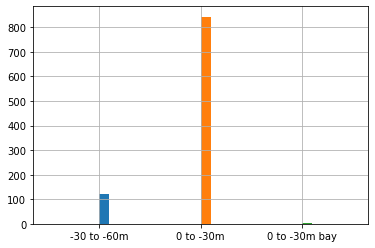

In [28]:
habitat_properties = habitat_properties_given_min_otter(hab_groups,threshold=1)
_=habitat_properties.groupby('DEPTH').DEPTH.hist()

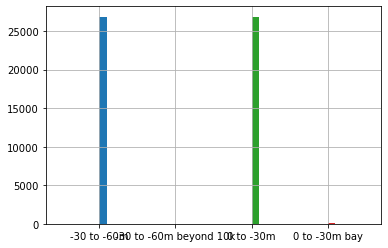

In [29]:
_=census.groupby('DEPTH').DEPTH.hist()

*DEPTH* attribute distribution for the entire dataset

In [30]:
habitat_properties = habitat_properties_given_min_otter(hab_groups,threshold=100)
otter_area_groups = habitat_properties.groupby('AREA')['AREA','OTTER_COUNT'].head()
alt.Chart(otter_area_groups).mark_circle().encode(
    x='AREA',
    y='OTTER_COUNT'
)

alt.Chart(...)

In [31]:
habitat_properties = habitat_properties_given_min_otter(hab_groups,threshold=0)
otter_area_groups = habitat_properties.groupby('AREA')['AREA','OTTER_COUNT'].head()
alt.Chart(otter_area_groups).mark_circle().encode(
    x='AREA',
    y='OTTER_COUNT'
)

alt.Chart(...)

#### Getting coordinate locations of habitats

In [32]:
geodata = gpd.read_file(FOLDERPATH+'Spring2014_SeaOtterCensus/Census_sum_14.dbf')
geodata.head()

,PERIMETER,AREA,DEPTH,ATOS_ID,HAB_ID,ACRES,HECTARES,ZONE_CODE,ZONE,Year,POLY_ID,dens_sm,lin_dens,trend5yr,Sect_ID,pupratio,geometry
0,3.698507,0.602352,-30 to -60m,1147,1147o,148.844341,60.235168,o,3,2014,1147o,0.000000,0.272222,0.150294,14,0.00000,"POLYGON ((-28037.593 -396876.146, -27690.763 -..."
1,4.985344,0.864146,-30 to -60m,1145,1145o,213.535186,86.414624,o,3,2014,1145o,0.000000,0.399206,0.157021,14,0.00000,"POLYGON ((-28810.811 -396342.994, -28690.789 -..."
2,3.297283,0.455185,0 to -30m,1115,1115n,112.478580,45.518466,n,2,2014,1115n,1.416809,1.095238,0.154812,14,0.13115,"POLYGON ((-42181.209 -396739.251, -42148.198 -..."
3,3.330648,0.567144,0 to -30m,1117,1117n,140.144271,56.714374,n,2,2014,1117n,2.091439,1.857143,0.163116,14,0.13592,"POLYGON ((-41310.055 -397603.867, -41378.689 -..."
4,3.852863,0.728688,0 to -30m,1121,1121n,180.062623,72.868758,n,2,2014,1121n,2.581352,2.492063,0.174117,14,0.12143,"POLYGON ((-39225.282 -396701.194, -39155.228 -..."


In [33]:
'''
RUNTIME HIGH
'''
# coords = {hab:geodata[geodata.HAB_ID == hab].geometry.to_crs(epsg=4326).centroid for hab in otter_groups_habitat.HAB_ID.values}
# pickle.dump(coords,open(FOLDERPATH+'crs_coords_dict.pkl','wb'))

'\nRUNTIME HIGH\n'

In [34]:
def create_habitat_coordinate_df(coords,otter_groups_habitat):

    lats,longs = [], []
    habitats = []
    for h,c in coords.items():
        habitats.append(h)
        try:
            lats.append(c.y.values.item())
            longs.append(c.x.values.item())
        except ValueError:
            lats.append(None)
            longs.append(None)
    
    habitat_coordinates = pd.DataFrame({
                    'HAB_ID': habitats,
                    'Latitude': lats,
                    'Longitude': longs,
                    'Otter_Count': otter_groups_habitat.total_otters
            })
    
    return habitat_coordinates

In [35]:
coords = pickle.load(open(FOLDERPATH+'crs_coords_dict.pkl','rb'))
habitat_coordinates = create_habitat_coordinate_df(coords,otter_groups_habitat)
habitat_coordinates.head()

,HAB_ID,Latitude,Longitude,Otter_Count
0,1000n,34.808753,-120.634792,0
1,1000o,34.807524,-120.681441,0
2,1001n,34.805066,-120.635534,0
3,1001o,34.805171,-120.681579,0
4,1002n,34.801391,-120.636842,0


In [36]:
habitat_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HAB_ID       2285 non-null   object 
 1   Latitude     1975 non-null   float64
 2   Longitude    1975 non-null   float64
 3   Otter_Count  2285 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 71.5+ KB


In [37]:
habitat_coordinates_2014 = habitat_coordinates.dropna()
habitat_coordinates_2014.shape

(1975, 4)

In [38]:
def plot_map(habitat_data,base=None,color='blue'):
        
    if not base:
        start_loc = [36.18907,-120.765664]
        base = folium.Map(location=start_loc,width='50%',height='70%',zoom_start=7,min_zoom=5,max_zoom=14)

    for hab_data_rows in habitat_data.iterrows():
        hab_data = hab_data_rows[1]
        popup_text = "Habitat:{}\nOtterCount:{}".format(hab_data.HAB_ID,hab_data.Otter_Count)
        folium.Marker(
            location=[hab_data.Latitude, hab_data.Longitude], 
            popup=popup_text, 
            icon=folium.Icon(color=color),
            tooltip=hab_data.HAB_ID
        ).add_to(base)

    return base

In [39]:
mask1 = (habitat_coordinates_2014.Otter_Count >= 50)
sel_hab_coords = habitat_coordinates_2014[mask1]
base_map = plot_map(sel_hab_coords)

In [40]:
mask2 = (habitat_coordinates_2014.Otter_Count == 0)
sel_hab_coords = habitat_coordinates_2014[mask2]
plot_map(sel_hab_coords,base=base_map,color='orange')

### Stranded data, 1985-2017

In [41]:
strand_df = pd.read_csv(FOLDERPATH+'/stranded_sea_otters/Table3_StrandedSeaOtter_byYearAndMonth_1985_2017.csv')

#### Stranded dataset description

In [42]:
strand_df.Age_Class.value_counts()

Adult        33
Immature     33
Pup          33
Old Adult    33
Subadult     32
Unknown      32
Sub-adult     1
Name: Age_Class, dtype: int64

In [43]:
# Clean data, change Sub-adult to Subadult

strand_df.Age_Class = strand_df.Age_Class.apply(lambda x: "Subadult" if x == "Sub-adult" else x)

In [44]:
strand_df.Age_Class.value_counts()

Adult        33
Immature     33
Pup          33
Subadult     33
Old Adult    33
Unknown      32
Name: Age_Class, dtype: int64

In [45]:
strand_df.Year.value_counts()

2017    6
2016    6
1986    6
1987    6
1988    6
1990    6
1991    6
1992    6
1993    6
1994    6
1995    6
1996    6
1997    6
1998    6
1999    6
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
1985    6
1989    5
Name: Year, dtype: int64

In [46]:
strand_df.head(15)

,Year,Age_Class,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,TOTAL
0,1985,Unknown,0,0,0,0,0,0,5,2,0,0,0,0,7
1,1985,Pup,0,0,1,0,0,0,1,0,0,1,3,1,7
2,1985,Immature,0,0,0,1,0,0,1,2,2,0,0,1,7
3,1985,Subadult,2,0,0,1,1,0,1,2,1,2,0,1,11
4,1985,Adult,0,2,1,1,1,7,4,3,5,3,1,0,28
5,1985,Old Adult,0,2,1,1,1,1,0,0,1,4,0,1,12
6,1986,Unknown,0,0,0,0,0,0,0,1,0,2,0,0,3
7,1986,Pup,1,2,1,1,3,1,0,1,2,0,0,1,13
8,1986,Immature,0,1,1,1,1,0,1,1,3,0,1,1,11
9,1986,Subadult,0,0,0,1,1,1,3,7,1,2,0,0,16


In [47]:
strand_df['Spring']= strand_df.Mar + strand_df.Apr + strand_df.May
strand_df['Summer']= strand_df.Jun + strand_df.Jul + strand_df.Aug
strand_df['Autumn']= strand_df.Sep + strand_df.Oct + strand_df.Nov
strand_df['Winter']= strand_df.Dec + strand_df.Jan + strand_df.Feb

#### Total stranding cases each year, 1985-2017

In [48]:
total_strand = strand_df.groupby(by='Year').sum().reset_index()
total_strand.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,TOTAL,Spring,Summer,Autumn,Winter
0,1985,2,4,3,4,3,8,12,9,9,10,4,4,72,10,29,23,10
1,1986,2,10,4,5,9,5,6,16,8,8,3,5,81,18,27,19,17
2,1987,4,7,10,4,5,11,7,16,4,11,7,8,94,19,34,22,19
3,1988,5,6,12,4,8,7,5,15,6,5,10,5,88,24,27,21,16
4,1989,3,6,14,6,6,9,7,8,10,7,11,1,88,26,24,28,10


In [49]:
alt.Chart(total_strand).mark_line().encode(
    x = 'Year',
    y = 'TOTAL'
)

alt.Chart(...)

#### Average stranding cases per month/ season

In [50]:
avg_month = total_strand.mean().drop('Year TOTAL Spring Summer Autumn Winter'.split()).reset_index().rename(columns={"index": "Month", 0: "Avg_Count"})
avg_month.head()

,Month,Avg_Count
0,Jan,13.030303
1,Feb,17.121212
2,Mar,21.060606
3,Apr,23.212121
4,May,19.606061


In [51]:
alt.Chart(avg_month).mark_bar().encode(
    x=alt.X('Month', sort=None),
    y='Avg_Count'
)

alt.Chart(...)

In [52]:
avg_season = total_strand.mean()['Spring Summer Autumn Winter'.split()].reset_index().rename(columns={"index": "Season", 0: "Avg_Count"})
avg_season

,Season,Avg_Count
0,Spring,63.878788
1,Summer,61.303030
2,Autumn,52.909091
3,Winter,43.212121


In [53]:
alt.Chart(avg_season).mark_bar().encode(
    x=alt.X('Season', sort=None),
    y='Avg_Count'
)

alt.Chart(...)

#### Seasonal trend of stranding

In [54]:
# seasonal_df = seasonal_df.groupby(by='Year').sum()
seasonal_df = pd.melt(strand_df, id_vars = ['Year'], value_vars = "Spring Summer Autumn Winter".split(), var_name = 'Season', value_name = 'Count')
seasonal_df = seasonal_df.groupby(by=['Year','Season']).sum().reset_index()
seasonal_df

,Year,Season,Count
0,1985,Autumn,23
1,1985,Spring,10
2,1985,Summer,29
3,1985,Winter,10
4,1986,Autumn,19
...,...,...,...
127,2016,Winter,82
128,2017,Autumn,80
129,2017,Spring,156
130,2017,Summer,135


In [55]:
alt.Chart(seasonal_df).mark_line().encode(
    x='Year',
    y='Count',
    color = 'Season'
)

alt.Chart(...)

In [56]:
strand_df

,Year,Age_Class,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,TOTAL,Spring,Summer,Autumn,Winter
0,1985,Unknown,0,0,0,0,0,0,5,2,0,0,0,0,7,0,7,0,0
1,1985,Pup,0,0,1,0,0,0,1,0,0,1,3,1,7,1,1,4,1
2,1985,Immature,0,0,0,1,0,0,1,2,2,0,0,1,7,1,3,2,1
3,1985,Subadult,2,0,0,1,1,0,1,2,1,2,0,1,11,2,3,3,3
4,1985,Adult,0,2,1,1,1,7,4,3,5,3,1,0,28,3,14,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2017,Pup,6,8,9,7,12,0,0,3,2,2,2,3,54,28,3,6,17
193,2017,Immature,4,5,5,8,7,6,8,8,4,2,2,4,63,20,22,8,13
194,2017,Subadult,5,8,13,9,11,10,10,10,8,9,11,5,109,33,30,28,18
195,2017,Adult,17,19,21,18,24,20,24,25,18,8,9,7,210,63,69,35,43


In [57]:
strand_df.mean()

Year      2001.060914
Jan          2.182741
Feb          2.868020
Mar          3.527919
Apr          3.888325
May          3.284264
Jun          2.944162
Jul          3.548223
Aug          3.776650
Sep          3.375635
Oct          3.157360
Nov          2.329949
Dec          2.187817
TOTAL       37.071066
Spring      10.700508
Summer      10.269036
Autumn       8.862944
Winter       7.238579
dtype: float64

In [58]:
age_seasonal_df = pd.melt(strand_df, id_vars = ['Age_Class'], value_vars = "Spring Summer Autumn Winter".split(), var_name = 'Season', value_name = 'Count')
age_seasonal_df = age_seasonal_df.groupby(by=['Season', 'Age_Class']).sum().reset_index()
age_seasonal_df

,Season,Age_Class,Count
0,Autumn,Adult,853
1,Autumn,Immature,189
2,Autumn,Old Adult,175
3,Autumn,Pup,165
4,Autumn,Subadult,310
5,Autumn,Unknown,54
6,Spring,Adult,787
7,Spring,Immature,361
8,Spring,Old Adult,239
9,Spring,Pup,419


In [59]:
alt.Chart(age_seasonal_df).mark_bar().encode(
    color='Season',
    x=alt.X('Age_Class', sort=['Pup', 'Immature', 'Subadult', 'Adult', 'Old Adult', 'Unknown']),
    y='Count',
).properties(width=220)

alt.Chart(...)